<a href="https://colab.research.google.com/github/LukaT11/quantitative_finance/blob/master/Monte%20Carlo%20Betting%20Simulations/Simple_Bettor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Monte Carlo Simulation**
Monte carlo simulators are often used to assess the risk of a given trading strategy say with options or stocks.

Monte carlo simulators can help drive the point home that success and outcome is not the only measure of whether or not a choice was good or not. Choices should not be assesed after their outcome. Instead, the risks and benefits should only be considered at the time the decision was made, without hindsight bias. A monte carlo simulator can help one visualize most or all of the potential outcomes to have a much better idea regarding the risk of a decision.

In [0]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import numpy as np

Let's consider a basic example. Here, we will consider a gambling scenario, where a user can "roll" the metaphorical dice for an outcome of 1 to 100.

If the user rolls anything from 1-50, the "house" wins. If the user rolls anything from 51 to 99, the "user" wins. If the user rolls a 100, they lose.
With this, the house maintains a mere 1% edge, which is much smaller than the typical house edge, as well as the market edge when incorporating trading costs.

In [0]:
def rollDice():
    
    roll = random.randint(1,100)

    if roll == 100:
        #print (roll,' roll was 100, you lose. What are the odds?! Play again!')
        return False
        
    elif roll <= 50:
        #print (roll, ' roll was 1-50, you lose.')
        return False
    
    elif 100 > roll >= 51:
        #print (roll, ' roll was 51-99, you win! *pretty lights flash* (play more!')
        return True

Now we need to create a bettor. Eventually, we'll create some more sophisticated bettors, but we'll start extremely basic for now, as even the simplist bettor will actually show us some fascinating things when it comes to chance and possibility, using a monte carlo generator.

In [0]:
def simple_bettor(funds, initial_wager, wager_count):
  
    global simple_busts
    global simple_profits
    
    value = funds
    wager = initial_wager
    
    wX = []
    vY = []

    currentWager = 1

    while currentWager < wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
            
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)
            
            if value <= 0:
                simple_busts += 1
                break

        currentWager += 1

    plt.plot(wX,vY)
        
    if value > funds:
        simple_profits += 1   

## **Simulation**
Lets simulate 10.000 bettors, starting with 10.000USD, betting 10USD per hand and betting 10.000 times and graph the results

100%|██████████| 10000/10000 [05:30<00:00, 30.30it/s]


Simple Bettor profit chance: 2.11
Simple Bettor loss chance: 97.89
Simple Bettor bust chance: 0.0


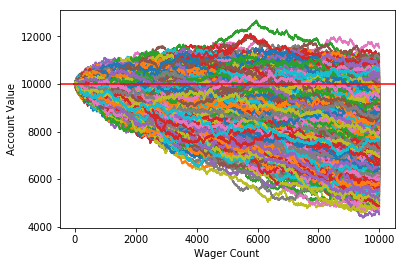

In [4]:
sample_size = 10000

startingFunds = 10000
wagerSize = 10
wagerCount = 10000

simple_busts = 0.0
simple_profits = 0.0

for i in tqdm(range(sample_size)):
    simple_bettor(startingFunds,wagerSize,wagerCount)

print(f'Simple Bettor profit chance: {(simple_profits/sample_size) * 100}')
print(f'Simple Bettor loss chance: {((sample_size - (simple_profits + simple_busts))/sample_size) * 100}')
print(f'Simple Bettor bust chance: {(simple_busts/sample_size) * 100}')
    
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.axhline(startingFunds, color = 'r')
plt.show()